<a href="https://colab.research.google.com/github/blacurly/MLOps/blob/main/LakeFS_Athletes_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install lakefs-client pandas
#!pip install scikit-learn matplotlib seaborn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#import lakefs_client

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.dummy import DummyRegressor
#from lakefs_client import Configuration, ApiClient
#from lakefs_client.api import repositories_api, objects_api, commits_api, branches_api

random_state=20250701

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Quarter 4/MLOps/athletes_v1.csv")

#### Data Cleaning

In [ ]:
# Add total_lift column
data['total_lift'] = data[['deadlift', 'candj', 'snatch', 'backsq']].sum(axis=1)

In [ ]:
data.to_csv("/content/drive/MyDrive/Quarter 4/MLOps/athletes_v1.csv", index=False)

#### Exploratory Data Analysis (EDA)

In [ ]:
data.info()
data.describe()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423006 entries, 0 to 423005
Data columns (total 28 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   athlete_id  423003 non-null  float64
 1   name        331110 non-null  object 
 2   region      251262 non-null  object 
 3   team        155160 non-null  object 
 4   affiliate   241916 non-null  object 
 5   gender      331110 non-null  object 
 6   age         331110 non-null  float64
 7   height      159869 non-null  float64
 8   weight      229890 non-null  float64
 9   fran        55426 non-null   float64
 10  helen       30279 non-null   float64
 11  grace       40745 non-null   float64
 12  filthy50    19359 non-null   float64
 13  fgonebad    29738 non-null   float64
 14  run400      22246 non-null   float64
 15  run5k       36097 non-null   float64
 16  candj       104435 non-null  float64
 17  snatch      97280 non-null   float64
 18  deadlift    115323 non-null  float64
 19  ba

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,deadlift,backsq,pullups,eat,train,background,experience,schedule,howlong,total_lift
0,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,400.0,305.0,NaN,NaN,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|,925.0
1,3517.0,Derek Abdella,NaN,NaN,NaN,Male,42.0,70.0,190.0,NaN,...,NaN,NaN,NaN,NaN,I have a coach who determines my programming|I...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|,0.0
2,4691.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,5164.0,Abo Brandon,Southern California,LAX CrossFit,LAX CrossFit,Male,40.0,67.0,NaN,211.0,...,375.0,325.0,25.0,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|,4+ years|,1145.0
4,5286.0,Bryce Abbey,NaN,NaN,NaN,Male,32.0,65.0,149.0,206.0,...,NaN,325.0,50.0,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I inc...,I played college sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I strictly s...,1-2 years|,680.0


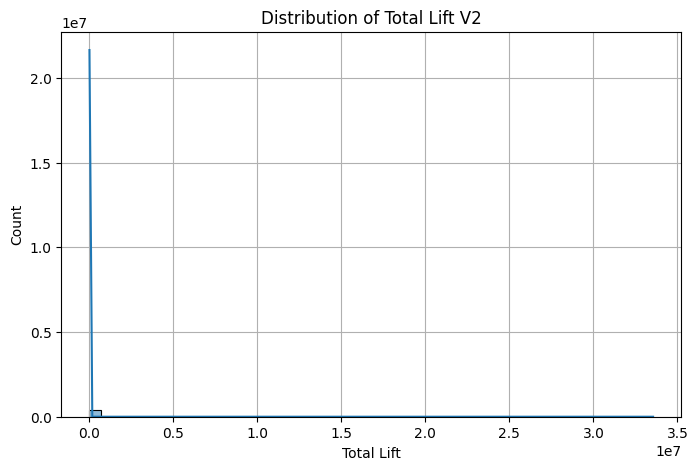

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data['total_lift'], bins=50, kde=True)
plt.title("Distribution of Total Lift V2")
plt.xlabel("Total Lift")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [ ]:
#correlation = athletes_v1.corr(numeric_only=True)
#sns.heatmap(correlation[['total_lift']].sort_values(by='total_lift', ascending=False), annot=True)

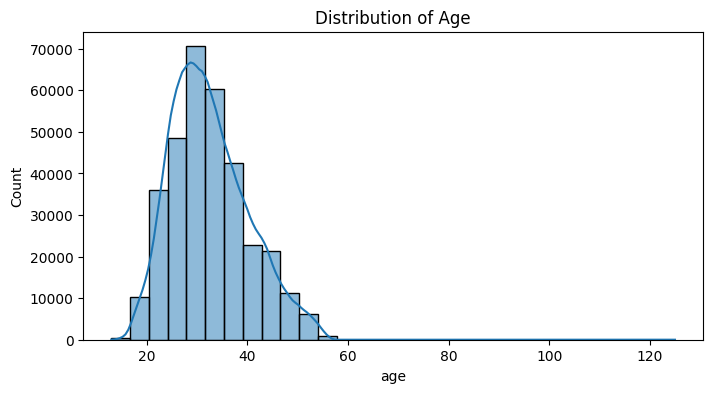

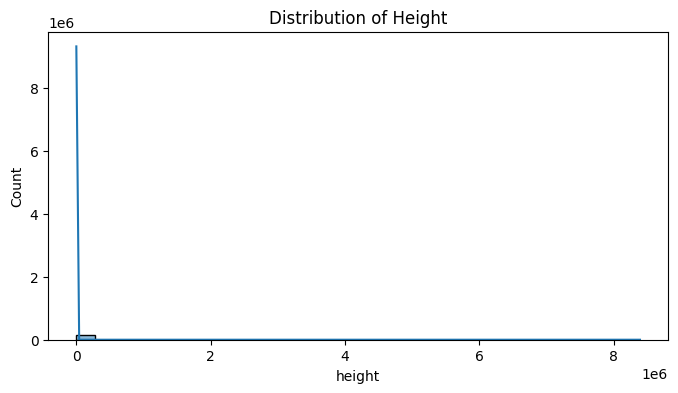

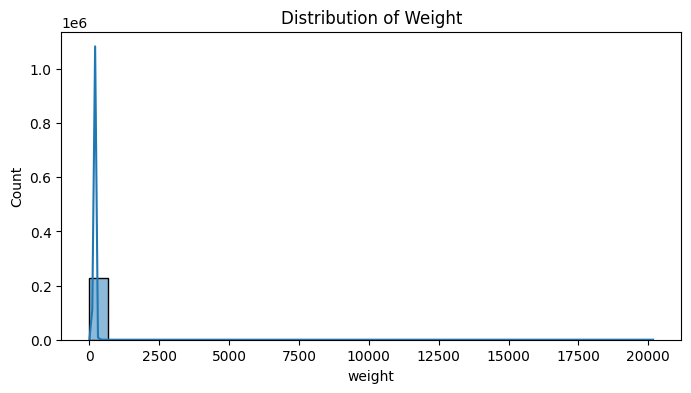

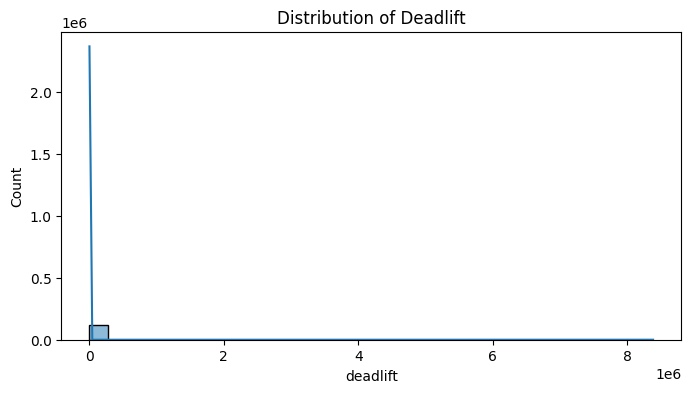

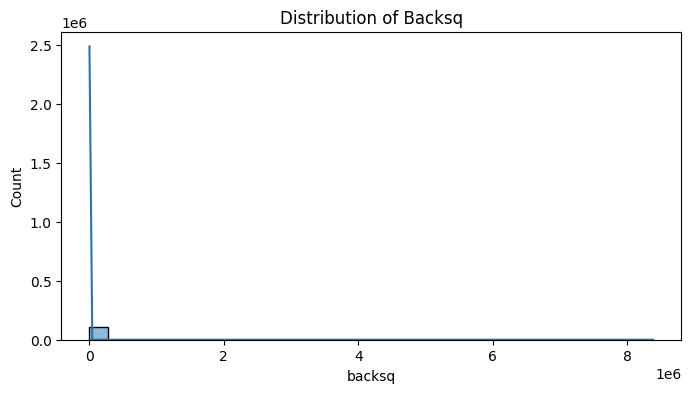

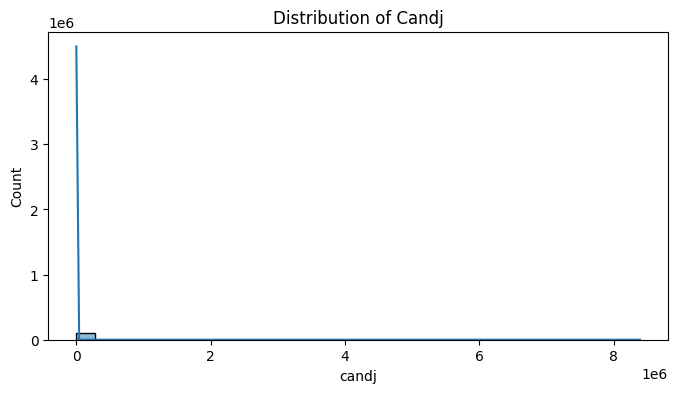

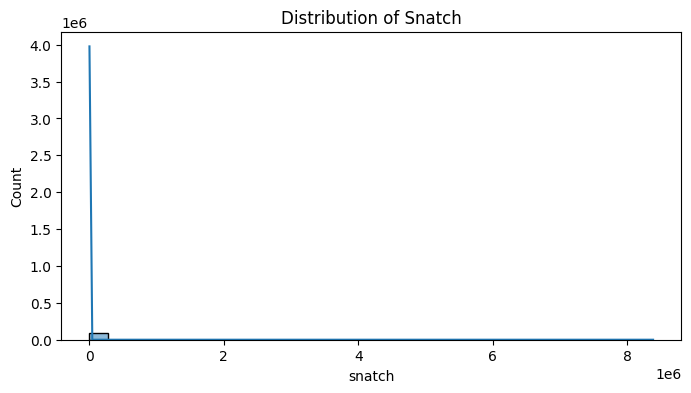

In [ ]:
metrics = ['age','height','weight', 'deadlift', 'backsq', 'candj', 'snatch']
for metric in metrics:
    plt.figure(figsize=(8,4))
    sns.histplot(data[metric], bins=30, kde=True)
    plt.title(f"Distribution of {metric.capitalize()}")
    plt.show()

In [ ]:
# Show unique values for object-type columns
categorical_cols = data.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"{col} — {data[col].nunique()} unique values")
    print(data[col].value_counts(dropna=False).head(), "\n")

name — 306752 unique values
name
NaN            91896
Jason Smith       26
David Smith       24
Ryan Smith        24
Brian Smith       24
Name: count, dtype: int64 

region — 17 unique values
region
NaN              171744
Europe            26268
North East        24386
South East        21361
South Central     19716
Name: count, dtype: int64 

team — 4532 unique values
team
NaN              267846
CrossFit NYC        625
Brick Nation        237
Studeo 55           220
CrossFit EaDo       200
Name: count, dtype: int64 

affiliate — 9778 unique values
affiliate
NaN                      181090
Unaffiliated               3292
CrossFit NYC                633
CrossFit Tuluka Nuñez       257
Brick CrossFit              238
Name: count, dtype: int64 

gender — 3 unique values
gender
Male      194926
Female    136128
NaN        91896
--            56
Name: count, dtype: int64 

eat — 47 unique values
eat
NaN                                                                                      3

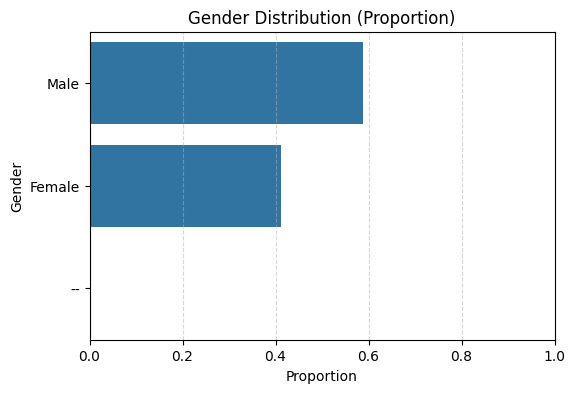

In [ ]:
# Gender Proportion
gender_counts = data['gender'].value_counts(normalize=True)
plt.figure(figsize=(6,4))
sns.barplot(x=gender_counts.values, y=gender_counts.index)
plt.title("Gender Distribution (Proportion)")
plt.xlabel("Proportion")
plt.ylabel("Gender")
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

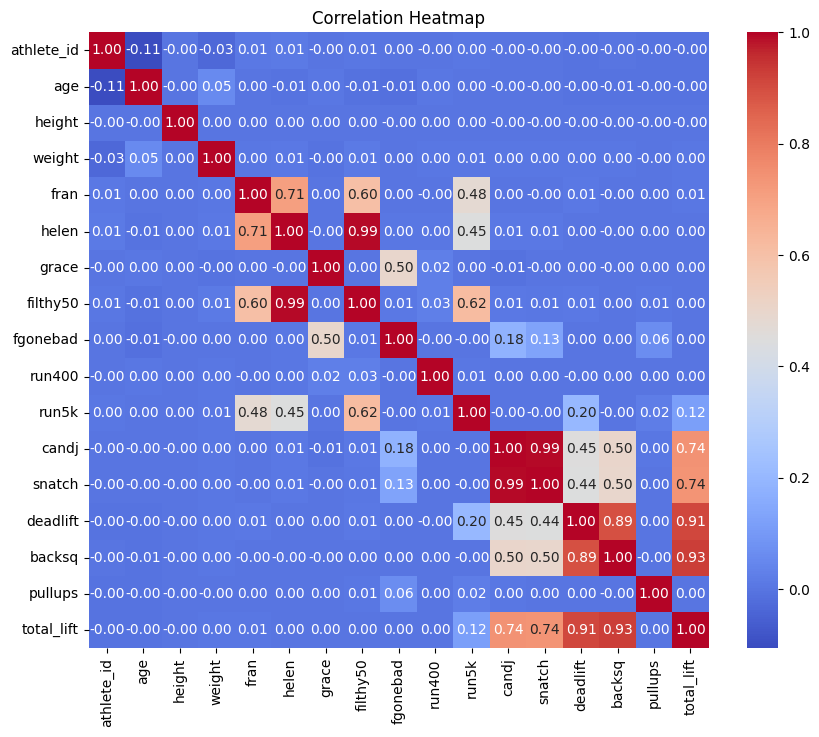

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
features = ['age','height','weight', 'deadlift', 'backsq', 'candj', 'snatch']
target = 'total_lift'

# Split
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (338404, 7), Test shape: (84602, 7)


#### Mean Regressor

In [ ]:
mean_regressor = DummyRegressor(strategy="mean")
mean_regressor.fit(X_train, y_train)
mean_pred = mean_regressor.predict(X_test)

#### Random Forest

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=random_state)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

#### XGBoost

In [ ]:
xgb_model = XGBRegressor(n_estimators=100, random_state=random_state)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

In [ ]:
def evaluate_model(name, y_true, y_pred):
    print(f"{name} Performance:")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"MAE : {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"R²  : {r2_score(y_true, y_pred):.3f}")
    print("-" * 30)

evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("XGBoost", y_test, xgb_pred)
evaluate_model("Mean", y_test, mean_pred)

Random Forest Performance:
RMSE: 67809.06
MAE : 308.70
R²  : 0.737
------------------------------
XGBoost Performance:
RMSE: 64550.89
MAE : 321.48
R²  : 0.761
------------------------------
Mean Performance:
RMSE: 132164.99
MAE : 1093.81
R²  : -0.000
------------------------------


In [ ]:
sample_test_data = X_test.sample(5, random_state=random_state)
sample_pred_rf = rf_model.predict(sample_test_data)
sample_pred_xgb = xgb_model.predict(sample_test_data)
sample_pred_mean = mean_regressor.predict(sample_test_data)

sample_results = sample_test_data.copy()
sample_results['Actual Total Lift'] = y_test.loc[sample_test_data.index]
sample_results['RF Predicted Total Lift'] = sample_pred_rf
sample_results['XGB Predicted Total Lift'] = sample_pred_xgb
sample_results['Mean Predicted Total Lift'] = sample_pred_mean

print("\nPredictions on Sample Test Data:")
sample_results


Predictions on Sample Test Data:


,age,height,weight,deadlift,backsq,candj,snatch,Actual Total Lift,RF Predicted Total Lift,XGB Predicted Total Lift,Mean Predicted Total Lift
320141,41.0,NaN,NaN,289.0,233.0,115.0,115.0,752.0,757.41,742.334167,347.162965
121188,25.0,73.0,209.0,455.0,405.0,275.0,225.0,1360.0,1356.90,1369.877197,347.162965
270256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,-0.101690,347.162965
298046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,-0.101690,347.162965
82620,28.0,75.0,225.0,485.0,415.0,295.0,235.0,1430.0,1430.01,1431.697266,347.162965
